<a href="https://www.kaggle.com/code/ahmadsoliman94/boston-housing?scriptVersionId=95321190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


### Load the Data

In [2]:
os.chdir('/kaggle/input/the-boston-houseprice-data/')

In [3]:
!ls

boston.csv


In [4]:
df=pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Data Cleaning

#### Check for Missing Data

In [6]:
print(df.isnull().sum().sort_values(ascending=False))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


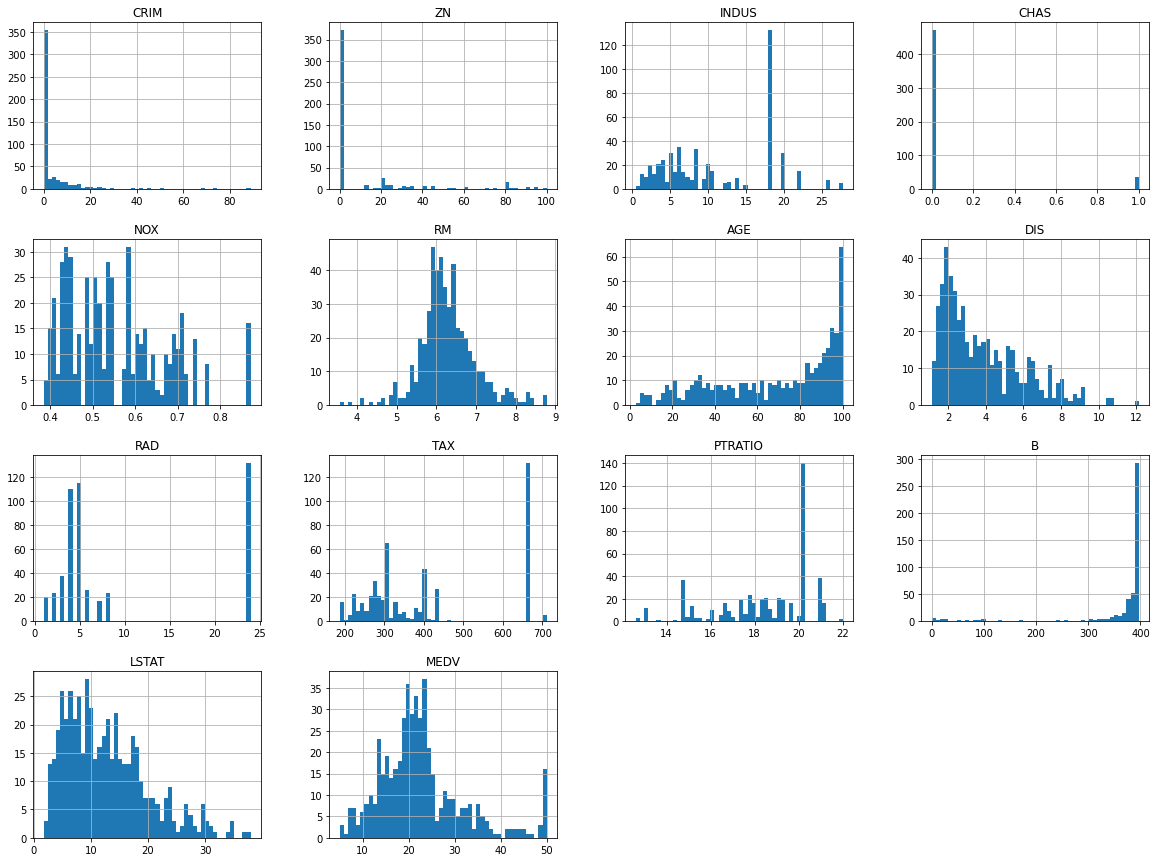

In [7]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

#### Data Visualization

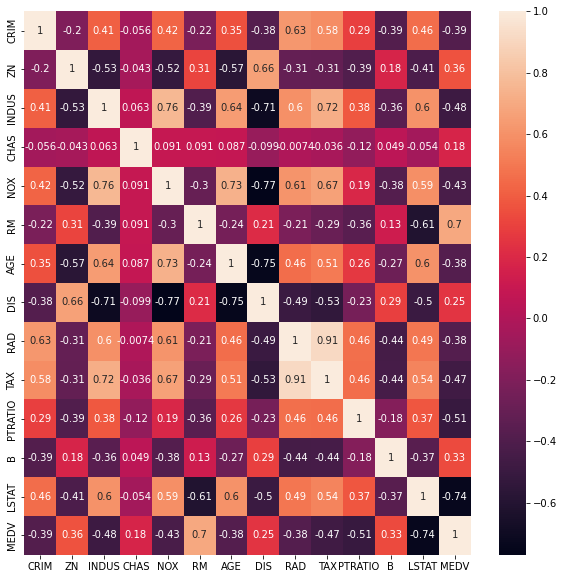

In [8]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

## Data Preprocessing


### Splitting Data

In [9]:
y=df.iloc[:,-1].values
X=df.iloc[:,:-1].values
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (506, 13) 
 y_shape: (506,)


In [10]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.20, random_state=42,shuffle=True)

In [11]:
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (404, 13) & X_test: (102, 13)
 y_train: (404,) & y_test: (102,)


### Select and Train a Model


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred_test = lin_reg.predict(X_test)
lin_pred_train = lin_reg.predict(X_train)
r2_test = r2_score(y_test,lin_pred_test)
r2_train = r2_score(y_train,lin_pred_train)
print('R squared of Linear Regression for Test Date :', r2_test)
print('R squared of Linear Regression for Train Date :', r2_train)

R squared of Linear Regression for Test Date : 0.6687594935356325
R squared of Linear Regression for Train Date : 0.7508856358979673


###  Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0000000000000002


### Fit the Model after Scaling 

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
lin_pred_test = lin_reg.predict(X_test_scaled)
lin_pred_train = lin_reg.predict(X_train_scaled)
r2_test = r2_score(y_test,lin_pred_test)
r2_train = r2_score(y_train,lin_pred_train)
print('R squared of Linear Regression for Test Date :', r2_test)
print('R squared of Linear Regression for Train Date :', r2_train)

R squared of Linear Regression for Test Date : 0.668759493535632
R squared of Linear Regression for Train Date : 0.7508856358979673


### Adding Polynomial Features

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

poly_fea = PolynomialFeatures(degree=2)
X_poly_train  = poly_fea.fit_transform(X_train)
X_poly_test  = poly_fea.fit_transform(X_test)
lin_reg.fit(X_poly_train,y_train)
lin_pred_test = lin_reg.predict(X_poly_test)
lin_pred_train = lin_reg.predict(X_poly_train)
r2_test = r2_score(y_test,lin_pred_test)
r2_train = r2_score(y_train,lin_pred_train)
print('R squared of Linear Regression for Test Date :', r2_test)
print('R squared of Linear Regression for Train Date :', r2_train)
    
    

R squared of Linear Regression for Test Date : 0.8065890293067055
R squared of Linear Regression for Train Date : 0.9388251256754898


In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0000000000000002


### Fit the Model after Scaling and Adding  Polynomial Features

In [17]:
lin_reg.fit(X_train_scaled,y_train)
lin_pred_test = lin_reg.predict(X_test_scaled)
lin_pred_train = lin_reg.predict(X_train_scaled)
r2_test = r2_score(y_test,lin_pred_test)
r2_train = r2_score(y_train,lin_pred_train)
print('R squared of Linear Regression for Test Date :', r2_test)
print('R squared of Linear Regression for Train Date :', r2_train)

R squared of Linear Regression for Test Date : 0.8055829447972093
R squared of Linear Regression for Train Date : 0.9409317027113497


### Regularization techniques

#### Ridge regressor


In [18]:
from sklearn.linear_model import Ridge

ridge =  Ridge(alpha = 0.05)
ridge.fit(X_train_scaled, y_train)
ridge_pred_train = ridge.predict(X_train_scaled)
ridge_pred_test = ridge.predict(X_test_scaled)
n_test = r2_score(y_test,ridge_pred_test)
n_train = r2_score(y_train,ridge_pred_train)
print('R Squared of train dataset: {}'.format(n_train))
print('R Squared of test dataset: {}'.format(n_test))

R Squared of train dataset: 0.9187433730488139
R Squared of test dataset: 0.8531442595986088


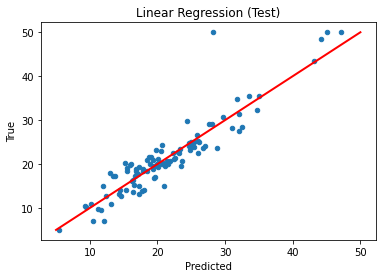

In [19]:
plt.scatter(ridge_pred_test, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Test)")
plt.show()

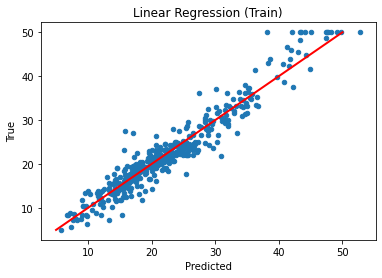

In [20]:
plt.scatter(ridge_pred_train, y_train, s=20)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Train)")
plt.show()